<a href="https://colab.research.google.com/github/gerardcalabrese/HCSPD2024/blob/main/Actividad_06_Uso_Julia_Colab_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img src="https://github.com/JuliaLang/julia-logo-graphics/raw/master/images/julia-logo-color.png" height="100" /> _Colab Notebook Template_

## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. If you need a GPU: _Runtime_ > _Change runtime type_ > _Harware accelerator_ = _GPU_.
3. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.
4. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, 3 and 4.
* After installation, if you want to change the Julia version or activate/deactivate the GPU, you will need to reset the Runtime: _Runtime_ > _Factory reset runtime_ and repeat steps 3 and 4.

# **ACTIVIDAD 6**
Se selecciona para esta actividad el problema del pendulo invertido. El mismo se ha resuelto con Octave en la Actividad 3.
En este caso, se procede a su solución programando en espacios de estado en el lenguaje _**Julia**_.

**Al igual que la actividad 1 y 2, se debe instalar el entorno de trabajo. En este caso Julia. Esto es un requisito ya que no esta disponible como lenguaje dentro del Colab**

**La instalación tarda unos minutos (nominalmente 2 min). El siguiente bloque de código realiza la instalación**

In [ ]:
%%shell
set -e
#-------#2min la JULIA_VERSION="1.10.2", dar F5--------------------------------------------#
JULIA_VERSION="1.10.2" # any version ≥ 0.7.0 iba 8 en lugar de 10
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#
if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz
  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done
  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia
  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.10.2 on the current Colab Runtime...
2024-06-14 03:50:35 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.10/julia-1.10.2-linux-x86_64.tar.gz [169654402/169654402] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.10

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Verificación de instalación correcta
Se debe actualizar todo el entorno de trabajo (presionando F5).
Ingresando a _Entorno de ejecución/Cambiar tipo de entorno de ejecución_ debería visualizarse Julia como lenguaje seleccionado.
La función `versioninfo()` del código siguiente debería imprimir la versión de Julia y alguna información del sistema

In [1]:
versioninfo()

Julia Version 1.10.2
Commit bd47eca2c8a (2024-03-01 10:14 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


Acá empieza el uso de JULIA en Colab.

# Uso de JULIA en Colab.
A patir de acá, se puede emplear toda la funcionalidad de JULIA.
La documentación está en sitios como

1. https://docs.sciml.ai/Overview/stable/
2. http://web.mit.edu/julia_v0.6.2/julia/share/doc/julia/html/en/index.html
3. https://www.julia-vscode.org/docs/dev/userguide/keyboard/ (Para Visual Studio)
4. https://juliacontrol.github.io/ControlSystems.jl/stable/ (Toolbox de Control)


#Instrucciones recomendadas
Para la simulación de procesos dinámicos, es muy útil emplear las instrucciones básicas para control y cálculo numérico.

In [2]:
using Pkg;
Pkg.add("Plots") #5min

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed JpegTurbo_jll ──────────────── v3.0.3+0
   Installed GR_jll ─────────────────────── v0.73.5+0
   Installed Libmount_jll ───────────────── v2.40.1+0
   Installed libfdk_aac_jll ─────────────── v2.0.2+0
   Installed LERC_jll ───────────────────── v3.0.0+1
   Installed Opus_jll ───────────────────── v1.3.2+0
   Installed x265_jll ───────────────────── v3.5.0+0
   Installed LoggingExtras ──────────────── v1.0.3
   Installed Xorg_xkbcomp_jll ───────────── v1.4.6+0
   Installed ConcurrentUtilities ────────── v2.4.1
   Installed Measures ───────────────────── v0.3.2
   Installed RelocatableFolders ─────────── v1.0.1
   Installed Contour ────────────────────── v0.6.3
   Installed Unitful ────────────────────── v1.20.0
   Installed PlotUtils ──────────────────── v1.4.1
   Installed OpenSSL ────────────────────── v1.4.3
   Installed RecipesPipeline ────────────── v0.6.12
   Installed Xorg_xc

In [7]:
using Plots

Cargar de librearías para interpretar Latex en los plot.

In [8]:
#import Pkg;
# using Pkg;
Pkg.add("LaTeXStrings")
using LaTeXStrings

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [b964fa9f] + LaTeXStrings v1.3.1
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


#Caso de Péndulo invertido: Condición estable

Así, para el equilibrio **estable**, ambas funciones son:

$\begin{equation*}
\begin{cases}
\ddot{\delta} = \dfrac{-Fricc \cdot \dot{\delta}+sin(\phi) \cdot {\dot{\phi}}^2\cdot long\cdot m \cdot l -sin(\phi)\cdot g\cdot m\cdot cos(\phi)+u}{M+m\cdot(1-cos\phi^2)} \\
\ddot{\phi} = \dfrac{(M+m)\cdot g\cdot sin\phi- cos\phi \cdot({\dot{\phi}}^2\cdot long\cdot m \cdot sin\phi-Fricc \cdot \dot{\delta}+u)}{l\cdot(M+m\cdot(1-cos\phi^2))}
\end{cases}
\end{equation*}$


Ahora se procede a realizar la integración numerica entre desde 0 a 5 segundos

In [21]:
function Pinv_estable(t_etapa, xant, accion)
  m = 0.1 ; M = 0.5; g = 9.81; l= 0.6 ; Fric =0.1
  At=1e-3;
  u=accion;
  delta=xant[1];
  deltap=xant[2];
  fi=xant[3];
  fip=xant[4];
  fipp = 0;
  x=xant;
  for ii = 1:t_etapa/At
    deltapp=(1/(M+m))*(u-m*l*fipp*cos(fi)+m*l*fip^2*sin(fi)-Fric*deltap);
    fipp=(1/l)*(g*sin(fi)-deltapp*cos(fi));

    #deltapp = (-Fric*deltap + sin(fi)*fip^2*l*m-sin(fi)*g*m*cos(fi)+u )/(M+m*(1-cos(fi)^2))
    #fipp = ((M+m)*g*sin(fi)-cos(fi)*(fip^2*l*m*sin(fi)-Fric*deltap+u) )/(l*(M+m*(1-cos(fi)^2)))
    xp=[deltap,deltapp,fip,fipp];
    x=x+xp*At;
    delta=x[1];
    deltap=x[2];
    fi=x[3];
    fip=x[4];
  end
  X=x;
end

Pinv_estable (generic function with 1 method)

In [22]:
X=-[0, 0,3.2,0];t_etapa=10e-4;
tF=5.;
Ts=t_etapa;
N_val = tF/Ts;
u=0;
x1 = Array{Float64, 1}(undef, trunc(Int, N_val)); #una columna con N_val elementos
x2 = Array{Float64, 1}(undef, trunc(Int, N_val)); #una columna con N_val elementos
x3 = Array{Float64, 1}(undef, trunc(Int, N_val)); #una columna con N_val elementos
x4 = Array{Float64, 1}(undef, trunc(Int, N_val)); #una columna con N_val elementos
acc= Array{Float64, 1}(undef, trunc(Int, N_val)); #una columna con N_val elementos
ii=0;
for t=0:t_etapa:tF-t_etapa
  ii=ii+1;
  x1[ii]=X[1];# posición delta
  x2[ii]=X[2];# velocidad delta
  x3[ii]=X[3];# Angulo fi
  x4[ii]=X[4];# velocidad angular fip
  X=Pinv_estable(t_etapa, X, u);
  acc[ii]=u;
  u=1;
end
t=0:t_etapa:tF-t_etapa;

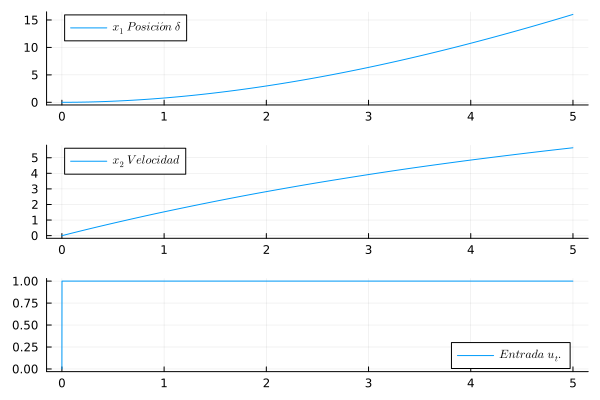

In [23]:
P1=plot(t, x1, label=L"x_1 \ Posici\'on \  \delta", lw=1)
P2=plot(t, x2, label=L"x_2 \ Velocidad", lw=1)
#P3=plot(t, x3, label=L"x_3 \ Posici\'on \ angular", lw=1)
#P4=plot(t, x4, label=L"x_3 \ Velocidad \ angular", lw=1)
P5=plot(t, acc, label=L"Entrada \ u_t.", lw=1)
#plot(P1, P2, P3,P4,P5, layout=(5,1) )
plot(P1, P2,P5, layout=(3,1) )
#plot(P1, P2, P3, layout=grid(3, 1, heights=[0.8 ,0.2, 1.1]))

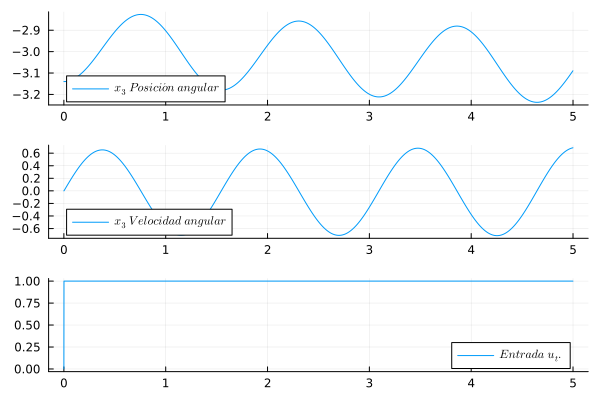

In [24]:
plot(P3,P4,P5, layout=(3,1) )